### Data Processing

In [423]:
import pandas as pd
import numpy as np
from numpy import array

Raw_Cities_Distance = pd.read_excel('Korea-Distance.xlsx', index_col=0)
Label = pd.read_excel('Korea-Distance.xlsx')
Raw_Cities_Distance = Raw_Cities_Distance.fillna(0)
# Sometimes, there's a bug to exclude index column of xlsx files during reading,
# even adding the 'index_col = None' statement.

# Raw_Cities_Distance
Label

,Unnamed: 0,Incheon,Seoul,Busan,Daegu,Daejeon,Gwangju,Suwon-si,Ulsan,Jeonju,Cheongju-si,Changwon,Jeju-si,Chuncheon,Hongsung,Muan
0,Incheon,NaN,27.0,335.0,244.0,141.0,257.0,33.0,316.0,186.0,115.0,304.0,439.0,102.0,95.0,275.0
1,Seoul,27.0,NaN,330.0,237.0,144.0,268.0,31.0,307.0,195.0,113.0,301.0,453.0,75.0,111.0,290.0
2,Busan,335.0,330.0,NaN,95.0,199.0,193.0,304.0,54.0,189.0,221.0,35.0,291.0,330.0,271.0,233.0
3,Daegu,244.0,237.0,95.0,NaN,117.0,171.0,212.0,75.0,130.0,130.0,72.0,324.0,236.0,191.0,215.0
4,Daejeon,141.0,144.0,199.0,117.0,NaN,137.0,114.0,192.0,61.0,36.0,167.0,323.0,175.0,74.0,171.0
5,Gwangju,257.0,268.0,193.0,171.0,137.0,NaN,238.0,222.0,77.0,173.0,161.0,186.0,311.0,162.0,44.0
6,Suwon-si,33.0,31.0,304.0,212.0,114.0,238.0,NaN,284.0,164.0,84.0,274.0,423.0,91.0,83.0,260.0
7,Ulsan,316.0,307.0,54.0,75.0,192.0,222.0,284.0,NaN,198.0,205.0,67.0,341.0,296.0,266.0,265.0
8,Jeonju,186.0,195.0,189.0,130.0,61.0,77.0,164.0,198.0,NaN,96.0,154.0,264.0,234.0,97.0,111.0
9,Cheongju-si,115.0,113.0,221.0,130.0,36.0,173.0,84.0,205.0,96.0,NaN,190.0,359.0,139.0,74.0,205.0


In [424]:
df = Label.iloc[:,0]
print(df)
print(df[0])

0         Incheon
1           Seoul
2           Busan
3           Daegu
4         Daejeon
5         Gwangju
6        Suwon-si
7           Ulsan
8          Jeonju
9     Cheongju-si
10       Changwon
11        Jeju-si
12      Chuncheon
13       Hongsung
14           Muan
Name: Unnamed: 0, dtype: object
Incheon


In [425]:
# transform to numpy
Cities_Distance = Raw_Cities_Distance.to_numpy()

### Generate all possible cities permutation

In [426]:

initial_schedule = list(range(len(Cities_Distance)))
#print(current_schedule)

def get_permutation(current_schedule):
    permutation = []
    for i in range(len(current_schedule)):
        for j in range(i+1, len(current_schedule)):
            neighbor = current_schedule.copy()
            neighbor[i] = current_schedule[j]
            neighbor[j] = current_schedule[i]
            loc = [i, j]
            loc.extend(neighbor)
            loc.extend([0,0])
            permutation.append(loc)
    permutation = np.array(permutation)

    return permutation

In [427]:
def get_schedule_length(arbitrary_array):
    sum = 0
    for j in range(len(arbitrary_array)-1):
        sum += Cities_Distance[arbitrary_array[j],arbitrary_array[j+1]]
    return sum

def get_new_schedule(permutation, best_result, boolean_table):
    store_i = 0
    store_j = 0
    current_schedule = []
    for i in range(len(permutation)):
        sum = 0
        sum = get_schedule_length(permutation[i,2:18])

        if boolean_table[permutation[i,0], permutation[i,1]]!=1:
            permutation[i,18] = int(sum)
            if (sum < best_result):
                best_result = sum
                store_i = permutation[i,0]
                store_j = permutation[i,1]
                current_schedule = permutation[i,2:17]

    boolean_table[store_i, store_j] = 1
    boolean_table[store_j, store_i] = 1

    return current_schedule, best_result, boolean_table

### (c) Run Random Walk to find the optimal path


In [428]:
best_result = get_schedule_length(np.append(initial_schedule, [0]))
best_schedule = initial_schedule
RW = []
RW.append(best_result)
for i in range(100):
    current_schedule = np.random.permutation(best_schedule)
    current_schedule_plus_0 = np.append(current_schedule,current_schedule[0])
    if(get_schedule_length(current_schedule_plus_0)<best_result):
        best_schedule = current_schedule
        best_result = get_schedule_length(current_schedule_plus_0)
    RW.append(best_result)

# print(RW)
RW_best_schedule = best_schedule

### (d) Run Hill Climbing to find the optimal path

In [429]:
# build a boolean table for HC
size = len(Cities_Distance)
HC_boolean_table = np.zeros((size, size), dtype=bool)
for i in range(size):
    HC_boolean_table[0, i] = HC_boolean_table[i, 0] = 1

### Start Iterations
best_schedule = initial_schedule
best_result = 10e6
HC = []
HC.append(get_schedule_length(np.append(initial_schedule, [0])))
for i in range(100):
    for j in range(1000):
        current_schedule = np.random.permutation(best_schedule)
        current_schedule_plus_0 = np.append(current_schedule,current_schedule[0])
        if(get_schedule_length(current_schedule_plus_0)<best_result):
            best_schedule = current_schedule
            best_result = get_schedule_length(current_schedule_plus_0)
    HC.append(best_result)
# print(HC)
HC_best_schedule = best_schedule

### (e) Run Tabular Search to find the optimal path

In [430]:
# build a boolean table for TS
size = len(Cities_Distance)
TS_boolean_table = np.zeros((size, size), dtype=bool)
for i in range(size):
    TS_boolean_table[0, i] = TS_boolean_table[i, 0] = 1

In [431]:
best_result = 10e6
TS = []
TS.append(get_schedule_length(np.append(initial_schedule, [0])))
best_schedule = initial_schedule
for i in range(100):
    # print(f'Step:{i}')
    permutation = get_permutation(best_schedule)
    current_schedule, best_result, TS_boolean_table = get_new_schedule(permutation,
                                                                       best_result,
                                                                       TS_boolean_table)
    if current_schedule != []:
        best_schedule = current_schedule
    else:
        pass
    best_schedule_plus_0 = np.append(best_schedule, [0])
    TS.append(get_schedule_length(best_schedule_plus_0))

best_schedule = np.append(best_schedule, [0])
best_result = get_schedule_length(best_schedule)
# print(f'The best_result is: {best_result}')
TS_best_schedule = best_schedule
# print(TS)
# print(f'Travel distances in each iterations {np.array(TS).shape}')

C:\Users\woody\Desktop\(Wed_234)_Computation_of_Data_Science\Homework\venv\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


---
### 3.(a) SA on travel route problem

In [432]:
# Define iteration numbers
n = 2
# Set temperature reduction factor
c = 0.5
NO_UPDATE_TIMES = 10e4

SA = []
SA.append(get_schedule_length(np.append(initial_schedule, initial_schedule[0])))

# Main
best_schedule = initial_schedule
import numpy as np
rand_4pts = []
for j in range(4):
    rand_schedule = np.random.permutation(initial_schedule)
    rand_4pts.append(get_schedule_length(np.append(rand_schedule, rand_schedule[0])))

init_temp = np.mean(rand_4pts)
print(f'The init_temp is: {init_temp}')

temp = init_temp
no_update_times = 0
update_times = 0
while((update_times<100)&(no_update_times<=NO_UPDATE_TIMES)):
    iter = 0
    while((iter<=n)&(no_update_times<=NO_UPDATE_TIMES)):
        # print(f'no_update_times = {no_update_times}')
        current_schedule = best_schedule

        # randomly select an new_schedule
        new_schedule = np.random.permutation(current_schedule)

        current_schedule_distance = get_schedule_length(np.append(current_schedule, current_schedule[0]))
        new_schedule_distance = get_schedule_length(np.append(new_schedule, new_schedule[0]))
        del_f = new_schedule_distance - current_schedule_distance
        # print(f'del_f = {del_f}')

        if (del_f)<0:
            r = np.random.uniform(0, 1, 1)
            Prob_of_X_2 = np.exp(-del_f/(1*temp))
            #print(f' r = {r} , $P(X_2)$ = {Prob_of_X_2}')
            if Prob_of_X_2>r:
                best_schedule = new_schedule
                SA.append(float(get_schedule_length(np.append(best_schedule, best_schedule[0]))))
                # print(SA)
                temp = c*temp
                update_times +=1
                no_update_times = 0
        else:
            no_update_times +=1

        iter += 1

for i in range(update_times+1, 101):
    SA.append(float(get_schedule_length(np.append(best_schedule, best_schedule[0]))))
SA_best_schedule = best_schedule
# print(SA)

The init_temp is: 2765.0


---
### FE plot

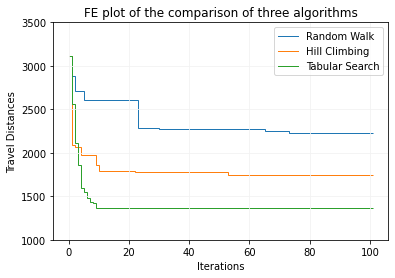

In [433]:
import matplotlib.pyplot as plt
plot1 = plt.stairs(RW, label='Random Walk', baseline=None)
plot1 = plt.stairs(HC, label='Hill Climbing', baseline=None)
plot1 = plt.stairs(TS, label='Tabular Search', baseline=None)

plot1 = plt.xlabel('Iterations')
plot1 = plt.ylabel('Travel Distances')
plot1 = plt.title('FE plot of the comparison of three algorithms')
# plt.xlim()
plot1 = plt.ylim(1000, 3500)
plot1 = plt.grid(axis='both', color='0.95')

plot1 = plt.legend(loc=1)

plot1 = plt.show()

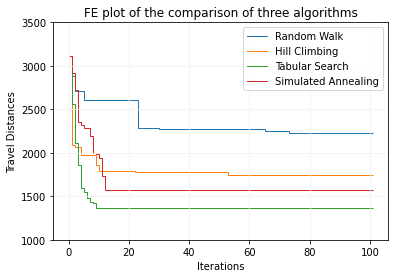

In [434]:
plot2 = plt.stairs(RW, label='Random Walk', baseline=None)
plot2 = plt.stairs(HC, label='Hill Climbing', baseline=None)
plot2 = plt.stairs(TS, label='Tabular Search', baseline=None)
plot2 = plt.stairs(SA, label='Simulated Annealing', baseline=None)

plot2 = plt.xlabel('Iterations')
plot2 = plt.ylabel('Travel Distances')
plot2 = plt.title('FE plot of the comparison of three algorithms')
# plt.xlim()
plot2 = plt.ylim(1000, 3500)
plot2 = plt.grid(axis='both', color='0.95')

plot2 = plt.legend(loc=1)

plot2 = plt.show()

In [435]:
import json

with open('result\Second_Part\RW.json', 'w') as f:
    json.dump(RW, f)

with open('result\Second_Part\HC.json', 'w') as f:
    json.dump(HC, f)

with open('result\Second_Part\TS.json', 'w') as f:
    json.dump(TS, f)

In [436]:
print(RW[100], HC[100], TS[100], SA[100])
for i in range(len(RW_best_schedule)):
    print(f'{df[RW_best_schedule[i]]}, ', end = " " )
print('\n')

for i in range(len(HC_best_schedule)):
    print(f'{df[HC_best_schedule[i]]}, ', end = " " )
print('\n')


for i in range(len(TS_best_schedule)):
    print(f'{df[TS_best_schedule[i]]}, ', end = " " )
print('\n')

for i in range(len(SA_best_schedule)):
    print(f'{df[SA_best_schedule[i]]}, ', end = " " )
print('\n')

2229.0 1744.0 1370.0 1571.0
Jeonju,  Ulsan,  Changwon,  Muan,  Jeju-si,  Hongsung,  Suwon-si,  Daegu,  Busan,  Gwangju,  Cheongju-si,  Incheon,  Chuncheon,  Seoul,  Daejeon,  

Cheongju-si,  Daejeon,  Gwangju,  Daegu,  Ulsan,  Busan,  Changwon,  Muan,  Jeju-si,  Jeonju,  Seoul,  Suwon-si,  Incheon,  Chuncheon,  Hongsung,  

Incheon,  Seoul,  Chuncheon,  Cheongju-si,  Daejeon,  Jeonju,  Gwangju,  Muan,  Jeju-si,  Changwon,  Busan,  Ulsan,  Daegu,  Hongsung,  Suwon-si,  Incheon,  

Changwon,  Jeju-si,  Muan,  Gwangju,  Jeonju,  Hongsung,  Incheon,  Seoul,  Cheongju-si,  Daejeon,  Chuncheon,  Suwon-si,  Daegu,  Ulsan,  Busan,  

